In [130]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Visualization
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import seaborn as sns



#### EDA

In [131]:
dataset = pd.read_excel('get_around_delay_analysis.xlsx')
dataset.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [132]:
dataset.shape

(21310, 7)

In [133]:
dataset.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


Répartition des types de réservation

In [134]:
count_checkin_type = dataset['checkin_type'].value_counts()
count_checkin_type

checkin_type
mobile     17003
connect     4307
Name: count, dtype: int64

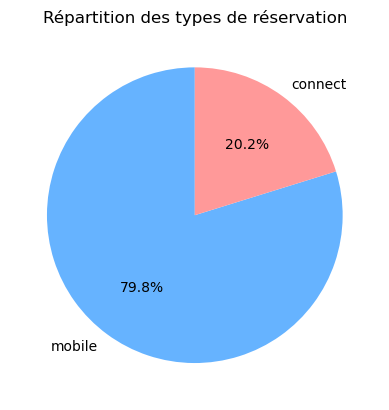

In [135]:
plt.pie(count_checkin_type, labels=count_checkin_type.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
# plt.axis('equal')  
plt.title('Répartition des types de réservation')
plt.show()

Les réservations sur le smartphone du propriétaires du véhicule, sont largement majoritaires

Répartition des statuts des véhicules 

In [136]:
count_state = dataset['state'].value_counts()
count_state

state
ended       18045
canceled     3265
Name: count, dtype: int64

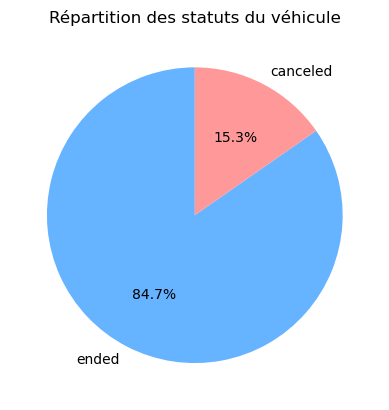

In [137]:
plt.pie(count_state, labels=count_state.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
# plt.axis('equal')  
plt.title('Répartition des statuts du véhicule')
plt.show()

Les réservations se terminant normalement sont majoritaires

##### Analyse des retards

In [138]:
dataset_notnull = dataset[~dataset['delay_at_checkout_in_minutes'].isnull()]
dataset_notnull.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
7,512303,371242,mobile,ended,-44.0,NaN,NaN


In [153]:
dataset_notnull[dataset_notnull["delay_at_checkout_in_minutes"] > 0].shape[0]

9404


Pourcentage des restitutions en retard : 58 %



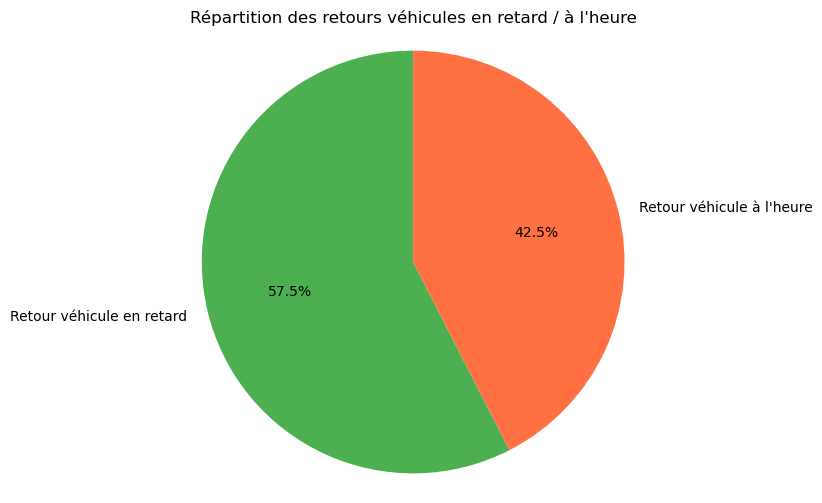

In [139]:

nb_total_lines = dataset_notnull['delay_at_checkout_in_minutes'].shape[0]
nb_late_checkout = dataset_notnull[dataset_notnull["delay_at_checkout_in_minutes"] > 0].shape[0]
nb_ontime_checkout = nb_total_lines - nb_late_checkout
percentage_late_checkout = (nb_late_checkout / nb_total_lines) * 100
print()
print(f"Pourcentage des restitutions en retard : {round(percentage_late_checkout)} %")
print()

labels = ["Retour véhicule en retard", "Retour véhicule à l'heure"]
sizes = [nb_late_checkout, nb_ontime_checkout]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF7043'])
plt.axis('equal')
plt.title("Répartition des retours véhicules en retard / à l'heure")
plt.show()



<b>Environ 58 % des véhicules sont restitués en retard.</b>

In [140]:
dataset_mobile = dataset_notnull[dataset_notnull["checkin_type"] == "mobile"]
nb_total_lines = dataset_mobile['delay_at_checkout_in_minutes'].shape[0]
nb_late_checkout = dataset_mobile[dataset_mobile["delay_at_checkout_in_minutes"] > 0].shape[0]
percentage_late_checkout = (nb_late_checkout / nb_total_lines) * 100
print()
print(f"Pourcentage des retards pour les réservations 'Mobiles' : {round(percentage_late_checkout)} %")


Pourcentage des retards pour les réservations 'Mobiles' : 61 %


In [141]:
dataset_connect = dataset_notnull[dataset_notnull["checkin_type"] == "connect"]
nb_total_lines = dataset_connect['delay_at_checkout_in_minutes'].shape[0]
nb_late_checkout = dataset_connect[dataset_connect["delay_at_checkout_in_minutes"] > 0].shape[0]
percentage_late_checkout = (nb_late_checkout / nb_total_lines) * 100
print()
print(f"Pourcentage des retards pour les réservations 'Connect' : {round(percentage_late_checkout)} %")


Pourcentage des retards pour les réservations 'Connect' : 43 %


<b>Les réservations de type "Mobile" enregistrent plus de retours en retard que les réservations de type "Connect"</b>

In [142]:
dataset_notnull['delay_at_checkout_in_hours'] = round(dataset_notnull['delay_at_checkout_in_minutes'] / 60, 2)
dataset_notnull.head()

C:\Users\Dominique Ourmiah\AppData\Local\Temp\ipykernel_12712\116540421.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_at_checkout_in_hours
1,507750,269550,mobile,ended,-81.0,NaN,NaN,-1.35
2,508131,359049,connect,ended,70.0,NaN,NaN,1.17
5,511626,398802,mobile,ended,-203.0,NaN,NaN,-3.38
6,511639,370585,connect,ended,-15.0,563782.0,570.0,-0.25
7,512303,371242,mobile,ended,-44.0,NaN,NaN,-0.73


In [143]:
dataset_late_hour = dataset_notnull[dataset_notnull['delay_at_checkout_in_hours'] >= 0]
dataset_late_hour.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_at_checkout_in_hours
2,508131,359049,connect,ended,70.0,NaN,NaN,1.17
9,513434,256528,connect,ended,23.0,NaN,NaN,0.38
12,514257,402596,mobile,ended,214.0,NaN,NaN,3.57
13,515147,257466,mobile,ended,15.0,NaN,NaN,0.25
17,518895,398816,mobile,ended,66.0,NaN,NaN,1.10


In [144]:
fig = px.box(dataset_late_hour, x = "delay_at_checkout_in_hours")
fig.show()

On trouve des outliers avec des valeurs de retard aberrantes (ex : 50 jours !)<br> On décide de supprimer les retards supérieurs à 12 heures

In [145]:
dataset_late_hour = dataset_late_hour[dataset_late_hour['delay_at_checkout_in_hours'] < 12]
print(dataset_late_hour.shape)
dataset_late_hour.head()

(9032, 8)


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_at_checkout_in_hours
2,508131,359049,connect,ended,70.0,NaN,NaN,1.17
9,513434,256528,connect,ended,23.0,NaN,NaN,0.38
12,514257,402596,mobile,ended,214.0,NaN,NaN,3.57
13,515147,257466,mobile,ended,15.0,NaN,NaN,0.25
17,518895,398816,mobile,ended,66.0,NaN,NaN,1.10


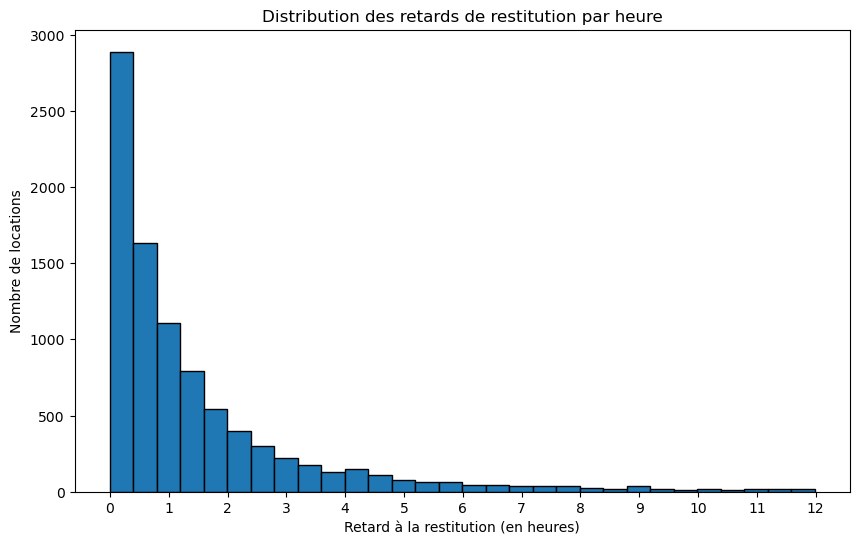

In [146]:
# Histogramme pour la colonne 'delay_at_checkout_in_hours'
plt.figure(figsize=(10,6))
plt.hist(dataset_late_hour['delay_at_checkout_in_hours'], bins=30, edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Retard à la restitution (en heures)')
plt.ylabel('Nombre de locations')
plt.title('Distribution des retards de restitution par heure')

plt.xticks(np.arange(0, dataset_late_hour['delay_at_checkout_in_hours'].max()+1, 1))  # Ajuste l'incrémentation selon tes données

# Afficher le graphe
plt.show()

<b>La majorité des retards sont inférieurs à 2 heures</b>

In [147]:
dataset_late_hour['time_delta_with_previous_rental_in_hours'] = round(dataset_late_hour['time_delta_with_previous_rental_in_minutes'] / 60, 2)


In [148]:
dataset_late_hour = dataset_late_hour[dataset_late_hour['time_delta_with_previous_rental_in_hours'] > 0]

In [149]:
dataset_late_hour.drop(columns=["delay_at_checkout_in_minutes", "time_delta_with_previous_rental_in_minutes"], axis=1, inplace=True)
dataset_late_hour.head()

,rental_id,car_id,checkin_type,state,previous_ended_rental_id,delay_at_checkout_in_hours,time_delta_with_previous_rental_in_hours
19,519491,312389,mobile,ended,545639.0,0.97,7.0
87,535611,397814,mobile,ended,535512.0,1.13,5.0
90,535770,352436,mobile,ended,524703.0,1.23,1.0
176,542374,409676,mobile,ended,540444.0,0.83,3.0
201,543679,225795,connect,ended,540663.0,1.07,9.0


In [150]:
dataset_late_hour.head(10)

,rental_id,car_id,checkin_type,state,previous_ended_rental_id,delay_at_checkout_in_hours,time_delta_with_previous_rental_in_hours
19,519491,312389,mobile,ended,545639.0,0.97,7.0
87,535611,397814,mobile,ended,535512.0,1.13,5.0
90,535770,352436,mobile,ended,524703.0,1.23,1.0
176,542374,409676,mobile,ended,540444.0,0.83,3.0
201,543679,225795,connect,ended,540663.0,1.07,9.0
206,543808,369230,mobile,ended,536315.0,1.25,1.0
246,546477,383309,mobile,ended,548486.0,0.27,11.0
265,547188,231676,mobile,ended,535868.0,4.43,0.5
284,548912,411521,mobile,ended,553683.0,3.75,1.0
359,553367,385783,mobile,ended,519328.0,0.40,2.5


In [151]:
dataset_late_hour['Percentage_late_checkout_vs_time_delta'] = dataset_late_hour.apply(lambda row: round((dataset_late_hour['delay_at_checkout_in_hours'] > row['time_delta_with_previous_rental_in_hours']).mean() * 100, 2), axis=1)
dataset_late_hour.head(10)

,rental_id,car_id,checkin_type,state,previous_ended_rental_id,delay_at_checkout_in_hours,time_delta_with_previous_rental_in_hours,Percentage_late_checkout_vs_time_delta
19,519491,312389,mobile,ended,545639.0,0.97,7.0,2.61
87,535611,397814,mobile,ended,535512.0,1.13,5.0,4.30
90,535770,352436,mobile,ended,524703.0,1.23,1.0,40.86
176,542374,409676,mobile,ended,540444.0,0.83,3.0,11.98
201,543679,225795,connect,ended,540663.0,1.07,9.0,0.92
206,543808,369230,mobile,ended,536315.0,1.25,1.0,40.86
246,546477,383309,mobile,ended,548486.0,0.27,11.0,0.31
265,547188,231676,mobile,ended,535868.0,4.43,0.5,64.52
284,548912,411521,mobile,ended,553683.0,3.75,1.0,40.86
359,553367,385783,mobile,ended,519328.0,0.40,2.5,14.59


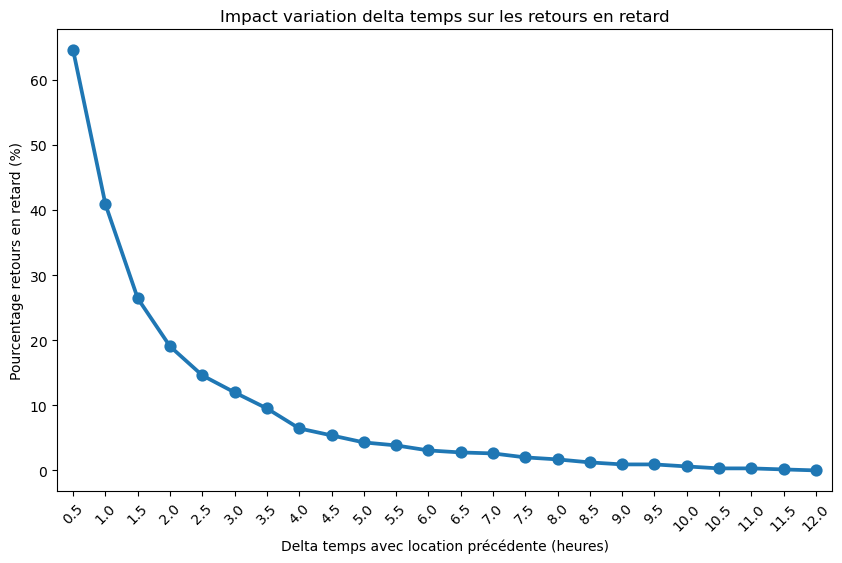

In [152]:
plt.figure(figsize=(10, 6))

# Création du bar plot avec seaborn
sns.pointplot(x='time_delta_with_previous_rental_in_hours', y='Percentage_late_checkout_vs_time_delta', data=dataset_late_hour)

# Ajouter un titre et des labels aux axes
plt.title('Impact variation delta temps sur les retours en retard')
plt.xlabel('Delta temps avec location précédente (heures)')
plt.ylabel('Pourcentage retours en retard (%)')

# Rotation des labels sur l'axe x si nécessaire (par exemple, pour éviter le chevauchement)
plt.xticks(rotation=45)

# Affichage du graphique
plt.show()

Logiquement, plus on augmente le delta de temps entre deux locations, plus le pourcentage de retours en retard diminue.<br>
On pourrait par exemple envisager un delta de <b>3 heures</b>. Ce qui amènerait le taux de restitution de véhibule en retard à 10 % environ<br>
sans générer un manque à ganer trop important.

Adresse application Streamlit : https://dom-project-getaround-2eea00b58ac9.herokuapp.com/